<a href="https://colab.research.google.com/github/FatimatuzzahroMutmainnah/Fruit-Image-Classification/blob/main/Fruit_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/UTP/'

Mounted at /content/gdrive


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fatimatuzzahrom","key":"7a406aa017583b6b76891395feefddc5"}'}

In [4]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [5]:
!kaggle datasets download -d moltean/fruits
!kaggle datasets download -d shreyaganjoo/fruit-image-classification -p /content/gdrive/My\ Drive/UTP --force

 99% 1.28G/1.28G [00:16<00:00, 122MB/s]
100% 1.28G/1.28G [00:16<00:00, 84.0MB/s]
  0% 0.00/3.85M [00:00<?, ?B/s]
100% 3.85M/3.85M [00:00<00:00, 117MB/s]


In [6]:
!ls "/content/gdrive/My Drive/UTP"

'Fruit Image Classification.ipynb'   fruit-image-classification.zip


In [7]:
!unzip -uq "/content/gdrive/My Drive/UTP/fruit-image-classification.zip" -d "/content/gdrive/My Drive/UTP"

#Preprocessing Data

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

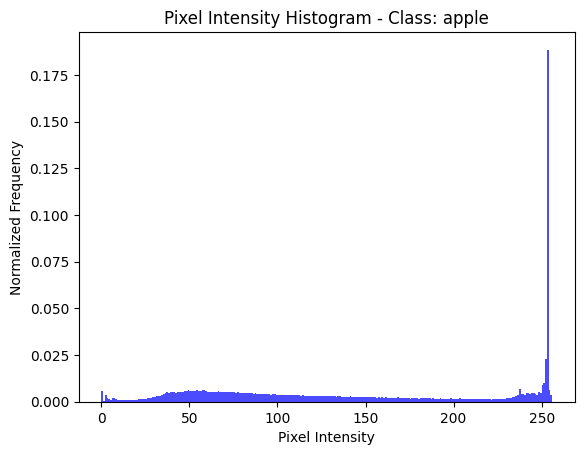

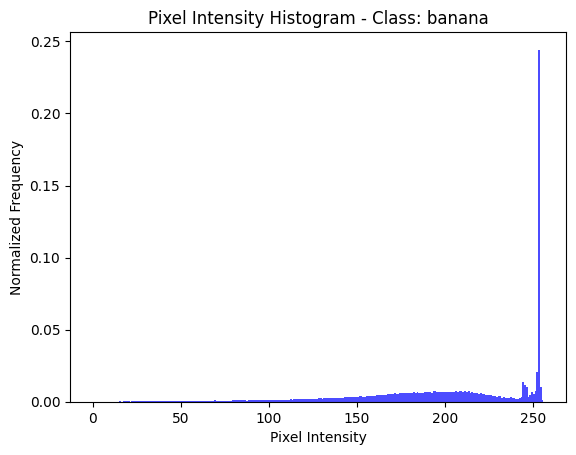

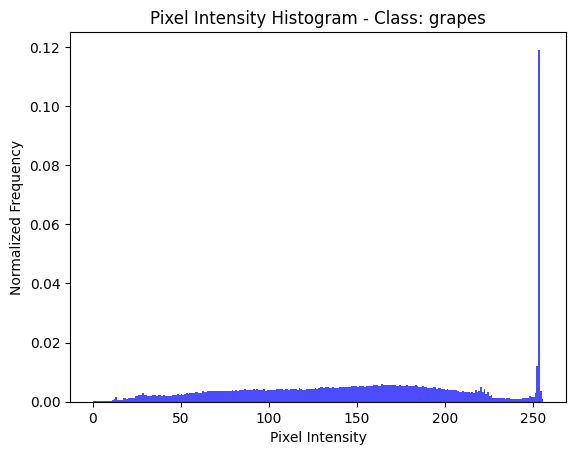

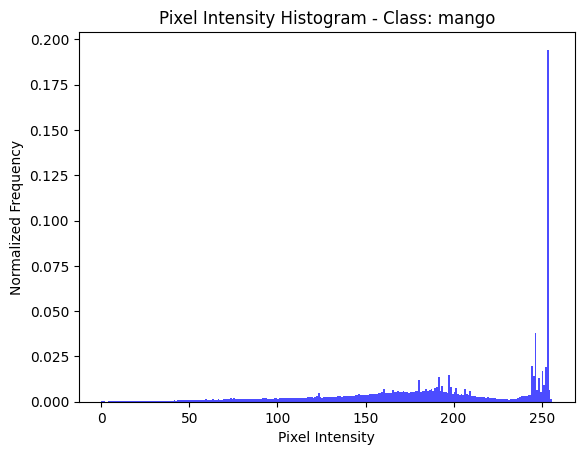

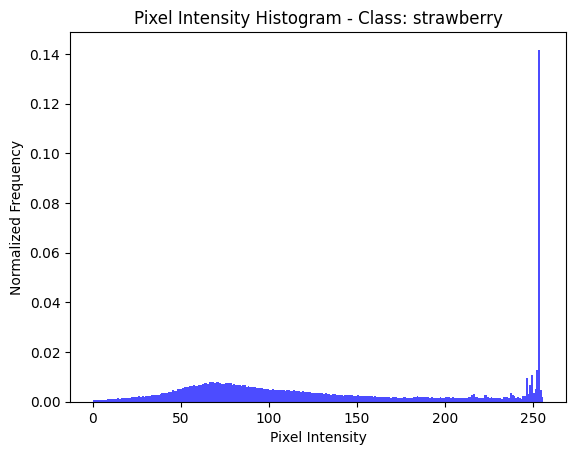

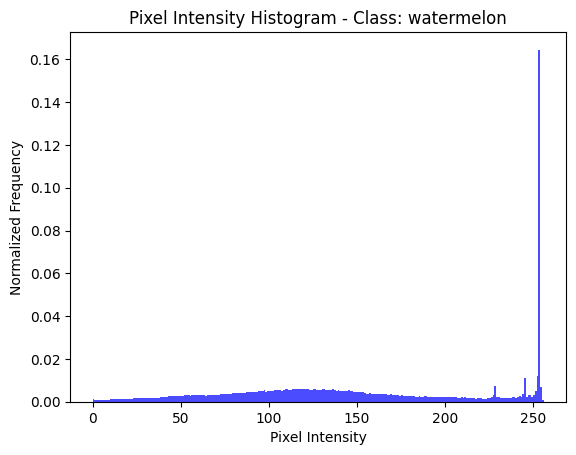

In [22]:
def plot_pixel_intensity_histogram(dataset_path, reduced_resolution=(64, 64), num_samples=50):
    classes = os.listdir(dataset_path)

    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        image_files = os.listdir(class_path)

        # Pilih sejumlah sampel gambar acak per kelas
        sample_images = np.random.choice(image_files, min(num_samples, len(image_files)), replace=False)

        # Kumpulkan nilai intensitas piksel untuk sampel gambar
        pixel_values = []
        for image_file in sample_images:
            image_path = os.path.join(class_path, image_file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Ubah ke citra grayscale

            # Resize gambar ke resolusi yang lebih kecil
            resized_image = cv2.resize(image, reduced_resolution, interpolation=cv2.INTER_AREA)

            # Ambil nilai piksel dari gambar yang telah diresize
            pixel_values.extend(resized_image.flatten())

        # Plot histogram intensitas piksel
        plt.hist(pixel_values, bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
        plt.title(f"Pixel Intensity Histogram - Class: {class_name}")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Normalized Frequency")
        plt.show()

# Path ke folder dataset gambar
dataset_folder_path = "/content/gdrive/MyDrive/UTP/Fruits_Dataset"

# Plot histogram intensitas piksel untuk setiap folder
plot_pixel_intensity_histogram(dataset_folder_path, reduced_resolution=(64, 64), num_samples=50)


In [23]:
def show_sample_images(dataset_path, num_samples_per_class=2):
    classes = os.listdir(dataset_path)

    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        image_files = os.listdir(class_path)

        # Pilih beberapa sampel gambar per kelas
        sample_images = np.random.choice(image_files, num_samples_per_class, replace=False)

        # Tampilkan sampel gambar
        for image_file in sample_images:
            image_path = os.path.join(class_path, image_file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            plt.imshow(image)
            plt.title(f"Class: {class_name}")
            plt.axis('off')
            plt.show()

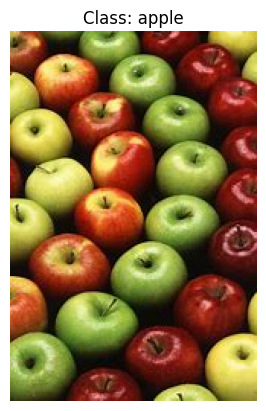

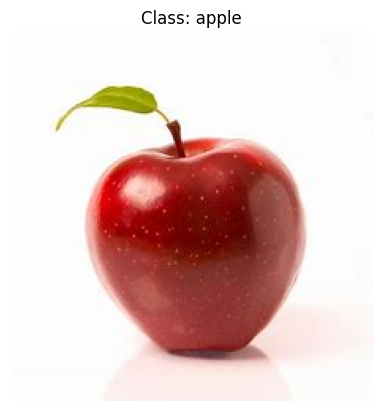

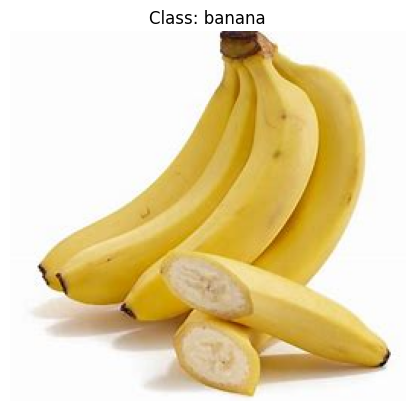

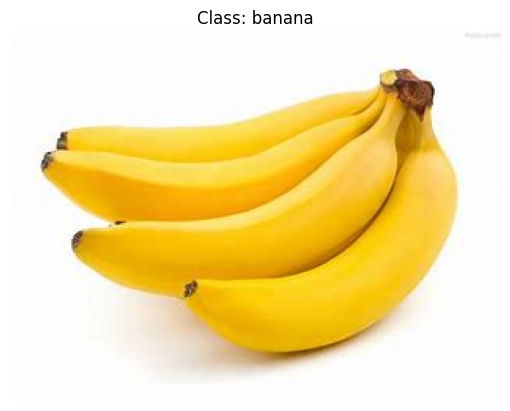

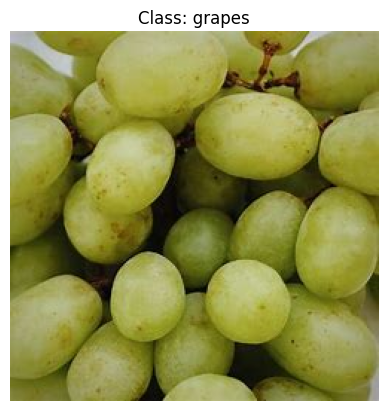

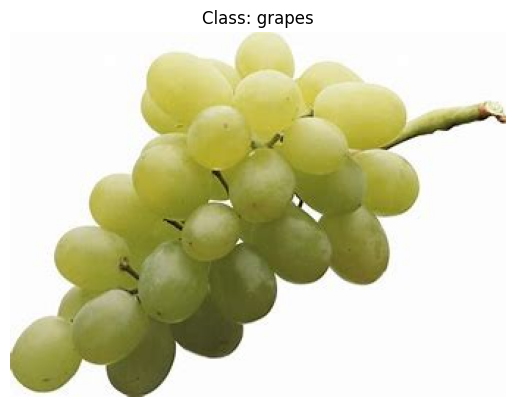

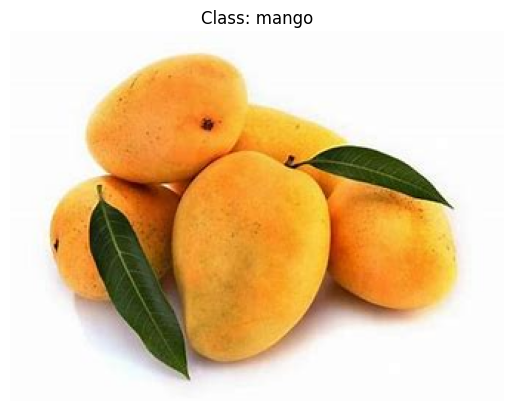

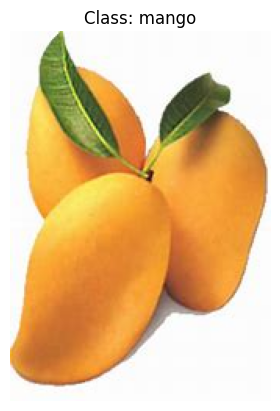

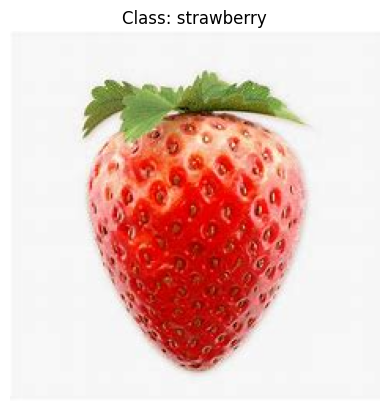

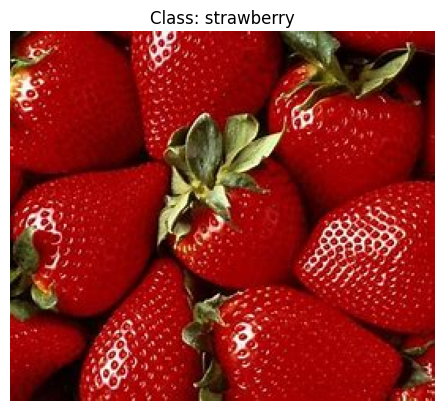

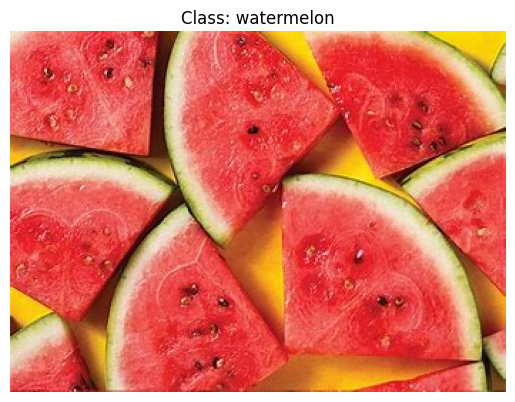

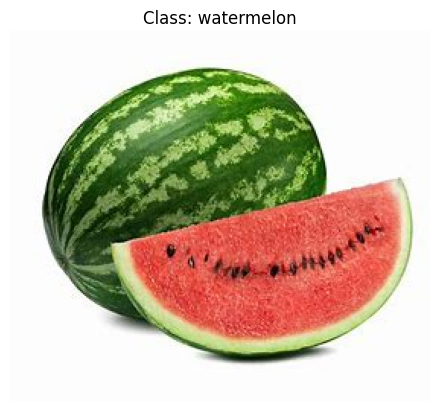

In [8]:
# Tampilkan 2 sampel gambar
show_sample_images(dataset_folder_path)

In [24]:
def check_class_balance(dataset_path):
    class_counts = {}

    classes = os.listdir(dataset_path)

    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

    return class_counts

# Pemeriksaan keseimbangan kelas
class_counts = check_class_balance(dataset_folder_path)

# Tampilkan jumlah gambar dalam setiap kelas
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Number of Images: {count}")


Class: apple, Number of Images: 50
Class: banana, Number of Images: 50
Class: grapes, Number of Images: 50
Class: mango, Number of Images: 50
Class: strawberry, Number of Images: 49
Class: watermelon, Number of Images: 51


In [25]:
def resize_images(input_folder, output_folder, target_size=(100, 100)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for class_name in os.listdir(input_folder):
        class_input_folder = os.path.join(input_folder, class_name)
        class_output_folder = os.path.join(output_folder, class_name)

        if not os.path.exists(class_output_folder):
            os.makedirs(class_output_folder)

        for image_name in os.listdir(class_input_folder):
            image_path = os.path.join(class_input_folder, image_name)
            output_path = os.path.join(class_output_folder, image_name)

            image = cv2.imread(image_path)
            resized_image = cv2.resize(image, target_size)
            cv2.imwrite(output_path, resized_image)

#membuat dataset baru buat resized image
input_dataset_folder = dataset_folder_path
output_resized_folder = "/content/gdrive/MyDrive/UTP/Resized_Fruits_Dataset"

resize_images(input_dataset_folder, output_resized_folder)

In [27]:
import shutil
from sklearn.model_selection import train_test_split

def split_and_copy_class_images(source_class_folder, destination_train_folder, destination_test_folder, train_ratio=0.8):
    image_files = [filename for filename in os.listdir(source_class_folder) if filename.endswith(".jpg")]
    train_files, test_files = train_test_split(image_files, train_size=0.8, random_state=42)

    def copy_files(source_folder, destination_folder, files):# Membuat folder
        os.makedirs(destination_folder, exist_ok=True)
        for filename in files:
            src_path = os.path.join(source_folder, filename)
            dst_path = os.path.join(destination_folder, filename)
            shutil.copyfile(src_path, dst_path)

    copy_files(source_class_folder, destination_train_folder, train_files)
    copy_files(source_class_folder, destination_test_folder, test_files)

# Path ke folder dataset gambar
dataset_folder_path = output_resized_folder

# Path ke folder output untuk menyimpan train dan test images
output_folder_path = "/content/gdrive/MyDrive/UTP/"

class_folders = [folder for folder in os.listdir(dataset_folder_path) if os.path.isdir(os.path.join(dataset_folder_path, folder))]

for class_folder in class_folders:
    class_folder_path = os.path.join(dataset_folder_path, class_folder)
    split_and_copy_class_images(class_folder_path, os.path.join(output_folder_path, 'train', class_folder), os.path.join(output_folder_path, 'test', class_folder))


In [51]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

def extract_features(image_path, target_size=(100, 100), layer_name='block5_pool'):
    # Load VGG16 model
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(target_size[0], target_size[1], 3))

    # Create a model that outputs the features from the desired layer
    model = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)

    # Load and preprocess gambar
    img = image.load_img(image_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Features
    features = model.predict(img_array)

    return features.flatten().tolist()  # Flatten the features and convert ke list


#Modelling

In [96]:
def extract_features_from_directory(directory_path, layer_name='block5_pool'):
    features_list, class_labels = [], []

    # Iterasi melalui setiap kelas di dalam direktori
    for class_label in os.listdir(directory_path):
        class_dir = os.path.join(directory_path, class_label)

        # Iterasi melalui setiap file gambar di dalam kelas
        for file in os.listdir(class_dir):
            if file.lower().endswith('.jpg'):
                image_path = os.path.join(class_dir, file)
                # Ekstraksi fitur menggunakan fungsi sebelumnya
                features = extract_features(image_path, layer_name=layer_name)

                features_list.append(features)
                class_labels.append(class_label)

    return features_list, class_labels

# Train
train_directory_path = '/content/gdrive/MyDrive/UTP/train'
train_features, train_labels = extract_features_from_directory(train_directory_path)

# Test
test_directory_path = '/content/gdrive/MyDrive/UTP/test'
test_features, test_labels = extract_features_from_directory(test_directory_path)


1/1 [==============================] - 0s 190ms/step


In [97]:
# Combine features and labels into numpy arrays
train_features_array = np.array(train_features)
test_features_array = np.array(test_features)
train_labels_array = np.array(train_labels)
test_labels_array = np.array(test_labels)

# Jumlah features
num_features = train_features_array.shape[1]
print(f'Jumlah Fitur: {num_features}')

Jumlah Fitur: 4608


In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Split train and test data
X_train, y_train = train_features, train_labels
X_test, y_test = test_features, test_labels

# model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Memprediksi label pada test
y_pred = model.predict(X_test)

# Evaluasi model training
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Training Data: {accuracy:.2f}')

# Prediksi label pada test
test_predictions = model.predict(test_features)

# Evaluasi model pada test
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f'Accuracy on Test Data: {test_accuracy:.2f}')

# Classification Report
print('\nClassification Report on Test Data:\n', classification_report(test_labels, test_predictions))


Accuracy on Training Data: 0.87
Accuracy on Test Data: 0.87

Classification Report on Test Data:
               precision    recall  f1-score   support

       apple       0.88      0.70      0.78        10
      banana       0.90      0.90      0.90        10
      grapes       1.00      0.90      0.95        10
       mango       0.82      0.90      0.86        10
  strawberry       0.77      1.00      0.87        10
  watermelon       0.90      0.82      0.86        11

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [99]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# model SVM
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Prediksi label pada test
y_predictions = svm_model.predict(X_test)

# Evaluasi model training
accuracy = accuracy_score(y_test, y_predictions)
print(f'Accuracy on Validation Data: {accuracy:.2f}')

# Prediksi label pada test
test_predictions = svm_model.predict(test_features)

# Evaluasi model pada test
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f'Accuracy on Test Data: {test_accuracy:.2f}')

# Classification Report
print('\nClassification Report on Test Data:\n', classification_report(test_labels, test_predictions))


Accuracy on Validation Data: 0.98
Accuracy on Test Data: 0.98

Classification Report on Test Data:
               precision    recall  f1-score   support

       apple       1.00      0.90      0.95        10
      banana       1.00      1.00      1.00        10
      grapes       1.00      1.00      1.00        10
       mango       1.00      1.00      1.00        10
  strawberry       0.91      1.00      0.95        10
  watermelon       1.00      1.00      1.00        11

    accuracy                           0.98        61
   macro avg       0.98      0.98      0.98        61
weighted avg       0.99      0.98      0.98        61



In [100]:
from sklearn.neighbors import KNeighborsClassifier

# model KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Memprediksi label pada test
knn_val_predictions = knn_model.predict(X_train)

# Evaluasi model training
knn_accuracy = accuracy_score(y_train, knn_val_predictions)
print(f'Accuracy of KNN on Validation Data: {knn_accuracy:.2f}')

# Prediksi label pada test
knn_test_predictions = knn_model.predict(test_features)

# Evaluasi model pada test
knn_test_accuracy = accuracy_score(test_labels, knn_test_predictions)
print(f'Accuracy of KNN on Test Data: {knn_test_accuracy:.2f}')

# Classification Report
print('\nClassification Report on Test Data:\n', classification_report(test_labels, knn_test_predictions))


Accuracy of KNN on Validation Data: 0.91
Accuracy of KNN on Test Data: 0.82

Classification Report on Test Data:
               precision    recall  f1-score   support

       apple       0.90      0.90      0.90        10
      banana       1.00      0.80      0.89        10
      grapes       0.77      1.00      0.87        10
       mango       0.57      0.80      0.67        10
  strawberry       0.91      1.00      0.95        10
  watermelon       1.00      0.45      0.62        11

    accuracy                           0.82        61
   macro avg       0.86      0.83      0.82        61
weighted avg       0.86      0.82      0.81        61



In [101]:
from sklearn.ensemble import RandomForestClassifier

# model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Memrediksi label pada test
rf_train_predictions = rf_model.predict(X_train)

# Evaluasi model training
rf_accuracy = accuracy_score(y_train, rf_train_predictions)
print(f'Accuracy of Random Forest on Validation Data: {rf_accuracy:.2f}')

# Prediksi label pada test
rf_test_predictions = rf_model.predict(test_features)

# Evaluasi model pada test
rf_test_accuracy = accuracy_score(test_labels, rf_test_predictions)
print(f'Accuracy of Random Forest on Test Data: {rf_test_accuracy:.2f}')

# Classification Report
print('\nClassification Report on Test Data:\n', classification_report(test_labels, rf_test_predictions))


Accuracy of Random Forest on Validation Data: 1.00
Accuracy of Random Forest on Test Data: 0.98

Classification Report on Test Data:
               precision    recall  f1-score   support

       apple       1.00      0.90      0.95        10
      banana       1.00      1.00      1.00        10
      grapes       1.00      1.00      1.00        10
       mango       1.00      1.00      1.00        10
  strawberry       0.91      1.00      0.95        10
  watermelon       1.00      1.00      1.00        11

    accuracy                           0.98        61
   macro avg       0.98      0.98      0.98        61
weighted avg       0.99      0.98      0.98        61



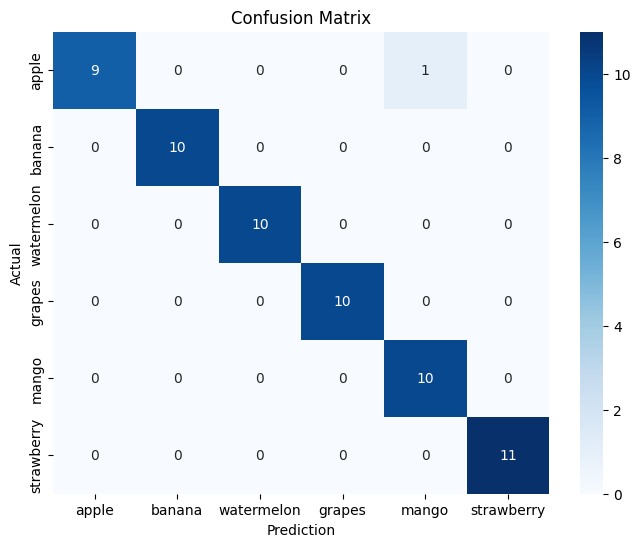

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Prediksi dari model terbaik (RF)
predictions = rf_model.predict(test_features)

# Label actual
true_labels = test_labels

# Menghitung Confusion Matrix
cm = confusion_matrix(true_labels, predictions)

# Meembuat heatmap Confusion Matrix
classes = ["apple", "banana", "watermelon", "grapes","mango","strawberry"]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()
